# The simpson Paradox

## Dados fonte


In [64]:
import pandas as pd
dados=pd.read_csv('berkley.csv',sep=',')

In [70]:
dados.index

RangeIndex(start=0, stop=24, step=1)

In [73]:
dados.columns

Index(['Admit', 'Gender', 'Dept', 'Freq'], dtype='object')

In [8]:
dados.head(3)

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89


In [79]:
dados.head(3)[['Freq']]

,Freq
0,512
1,313
2,89


In [88]:
dados.loc[2:5,['Gender','Dept']]

,Gender,Dept
2,Female,A
3,Female,A
4,Male,B
5,Male,B


In [97]:
dados.iloc[3:5,0:2] #3:5 representa linhas e 0:2 representa colunas

,Admit,Gender
3,Rejected,Female
4,Admitted,Male


In [53]:
(dados.groupby(by=['Dept','Admit']).count())

Gender  Freq
Dept Admit                 
A    Admitted       2     2
     Rejected       2     2
B    Admitted       2     2
     Rejected       2     2
C    Admitted       2     2
     Rejected       2     2
D    Admitted       2     2
     Rejected       2     2
E    Admitted       2     2
     Rejected       2     2
F    Admitted       2     2
     Rejected       2     2

In [107]:
dados[dados.Freq>380] #localizando dados maiores que 380 em todo o dataframe

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
11,Rejected,Female,C,391


In [108]:
dados.mean()

Freq    188.583333
dtype: float64

### Pivot Table dos dados (OLAP/ Multiplas dimensões)

In [119]:
pd.pivot_table(dados,values='Freq',index=['Dept'],columns=['Gender','Admit'])
#pd.pivot_table(dados, values='Freq', index=)

Gender   Female              Male         
Admit  Admitted Rejected Admitted Rejected
Dept                                      
A            89       19      512      313
B            17        8      353      207
C           202      391      120      205
D           131      244      138      279
E            94      299       53      138
F            24      317       22      351

## Criando séries temporais

In [146]:
rng = pd.date_range('1/1/2016', periods=60, freq='D') #freq pode ser em dias, horas, segundos etc...

In [147]:
rng

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-16',
               '2016-01-17', '2016-01-18', '2016-01-19', '2016-01-20',
               '2016-01-21', '2016-01-22', '2016-01-23', '2016-01-24',
               '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
               '2016-01-29', '2016-01-30', '2016-01-31', '2016-02-01',
               '2016-02-02', '2016-02-03', '2016-02-04', '2016-02-05',
               '2016-02-06', '2016-02-07', '2016-02-08', '2016-02-09',
               '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-13',
               '2016-02-14', '2016-02-15', '2016-02-16', '2016-02-17',
               '2016-02-18', '2016-02-19', '2016-02-20', '2016-02-21',
               '2016-02-22', '2016-02-23', '2016-02-24', '2016-02-25',
      

In [165]:
import numpy as np
import matplotlib as mpl
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

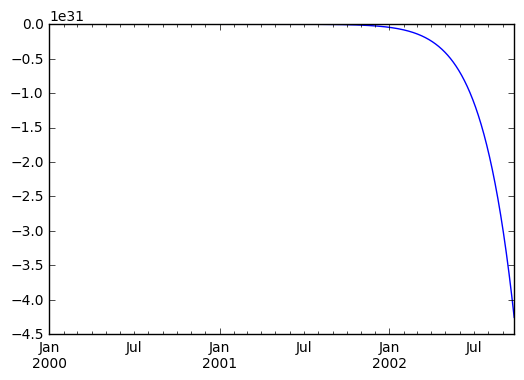

In [186]:
ts = ts.cumsum()
import matplotlib.pyplot as plt
%matplotlib inline
ts.plot()

In [195]:
# convertendo dados para HDF
# falhou quando realizaei teste.

'''
dados.to_hdf('dados.h5',dados)
'''


"\ndados.to_hdf('dados.h5',dados)\n"

Reference: 
1. http://pandas.pydata.org/pandas-docs/stable/10min.html
1. https://www.hdfgroup.org/why-hdf/
2. https://support.hdfgroup.org/downloads/index.html

## Os dados apresentam o conhecido paradoxo de simpson onde temos:

a) variavel explicativa

### Variaveis dependentes (representam resultado)
##### As variáveis dependentes representam a saída ou resultado cuja variação está sendo estudado.

### Variaveis independentes (entradas ou causas)
##### As variáveis independentes representam entradas ou causas, i.é. os possíveis motivos para a variação.


Modelos testam ou explicam os efeitos que as variáveis independentes têm sobre as variáveis dependentes.

neste exemplo temos:
z = f(x,y) 
onde:
z :varaivel dependente 
x, y : variáveis independentes

##### Em um experimento estatístico a variável dependente é o evento /resultado que se espera ser alterado quando a variável independente é manipulada.

Em ferramentas de mineração de dados (com estatística multivariada e de aprendizagem de máquina)

1) a variável dependente é possui o papel de variável alvo (target variable ou label atribute)

2) já a variável independente possui papel de regular variável.

Para o treinamento, valores Conhecidos para a variável alvo são fornecidos para o conjunto de dados de treino/teste de conjunto de dados, mas devem possibilitar predizer os resultados para outros dados.

# Simpson's paradox 

Cada Simpson's paradox envolve no mínimo tres variaveis :

    the explained
    the observed explanatory
    the lurking explanatory

Se o efeito observado da variável explicativa (variavel independente) sobre a variável explicada (variavel dependente) muda de direção quando você explica a variável de expreita (lurking), temos um Paradoxo de Simpson.

Por exemplo, para a direita, x parece ter um efeito negativo sobre y, mas o oposto é verdadeiro quando você conta,explica pela cor.

y é a variável explicada, x observados da variável explicativa, e a cor espreita variável explicativa.

For example, to the right, x appears to have a negative effect on y, but the opposite is true when you account for color. y is the explained variable, x the observed explanatory variable, and color the lurking explanatory variable.


Uma variável explicativa é aquela que explica as alterações na variável.

Num tratamento de cancer de mama onde estamos pesquisando melhor tratamento para pacientes temos a seguinte pergunta:

P: Que procedimento/dose prolonga mais a vida dos pacientes  (tendo inicialmente tempo de vída médio como 10 anos)

    a) Observe que neste caso o tempo de sobrevivência (y) é a variável de resposta.
    
    b) O tipo de dado terapia (x) é a variável explicativa (explanatory variable); ela pode ou não afetar a variável de resposta.


Tenho portanto com exemplo:

    Trat/terapia -  Tempo
      A (20 mg)     -  reduz em média 2 o tempo de sobrevida
      B (15 mg)     -  aumenta 8 anos em media o tempo de sobrevida
      C (10 mg)     -  aumenta 10 anos em media o tempo de sobrevida
      D (5  mg)     -  não altera o tempo de sobrevida

Um gráfico de dispersão pode ajudar você a ver as tendências entre dados pareados. Se você tiver uma variável resposta e uma variável explicativa, a variável explicativa é sempre plotados no eixo x (eixo horizontal).

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
tratamentos = [20,15,10,5]
tempos_medios_sobrevida = [-2,8,10,0]
#vamos adicionar 10 anos que é a media sem tratamento
temp_med_corrigidos =[x+10 for x in tempo_medio_sobrevida]
print("Tratamentos",tratamentos)
print("Tempo corrigido",temp_med_corrigidos)

Tratamentos [20, 15, 10, 5]
Tempo corrigido [8, 18, 12, 10]


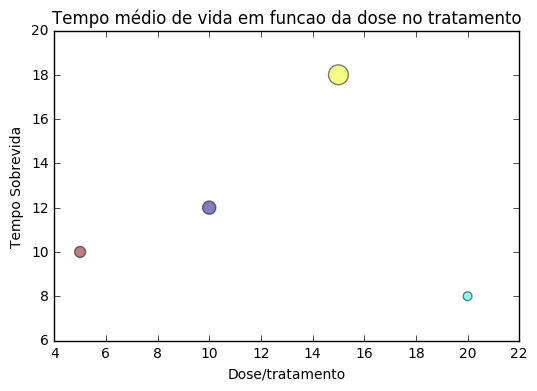

In [126]:
NumeroCores=4
x_tratamentos = tratamentos
y_tempo = temp_med_corrigidos
colors = np.random.rand(NumeroCores)
area = (np.pi *(np.asarray(y_tempo))**2)/5  # 0 to 15 point radiuses

plt.scatter(x_tratamentos, y_tempo, s=area, c=colors, alpha=0.5)
plt.ylabel("Tempo Sobrevida")
plt.xlabel('Dose/tratamento')
plt.title('Tempo médio de vida em funcao da dose no tratamento')
plt.show()

Uma explanatory variable é um tipo de variavel explicativa independente. Entretanto, uma variavel independente não é afetada por nenhuma das outras variáveis. Assim, quando uma variável não é independente, é uma variável explicativa.



Exemplo: ganho de peso = fastFood + refrigerante, tecnicamente você não precisa de comer fastFood junto com refrigerente. Entretanto é muito comum quando se pede um refrigerante comer algum tipo de comida fastFood o mesmo acontece quando pedimos um cachorro quente ou hamburger, e comumente pedimos um refrigerante como acompanhamento. Portanto, estas variáveis não são completamente independentes. Entretanto, são chamados de variáveis explicativas, porque eles podem oferecer alguma explicação para o ganho de peso.

    Ganho de peso =  variavel dependente
    Fast Food e Consumo de refrigerante = variaveis independentes
    
    

A linha entre as variáveis independentes e as variáveis explicativas é normalmente bastante tenue e somente possuirá importancia relevante caso estejamos trabalhando com pesquisa avançada que envolve muitas variaveis com interação entre elas. Ela pode ser importante em investigações clínicas. É muito comum em estatistica os dois termos serem utilizados como sendo basicamente os mesmos

    Então varaiveis eploratorias ocorem quando nossas variaveis independentes possuem certa dependencia (explanatory variables)

### Lurking Variable

Uma variável de espreita (lurking variable) é aquela cujos efeitos sobre a variável de resposta (response variable) não pode ser distinguido de uma ou mais das variáveis explicativas no estudo, E NÃO É INCORPORADO AO PROJETO DO ESTUDO.

### Confounding Variable

A diferença entre lurking variable e confouning variable (variavel de confusão) está nas usa inclusão no estudo.

Variável de confusão refere-se a um problema que pode surgir em um experimento, quando não há outra variável que pode afetar a resposta e está de alguma forma ligada, conjuntamente com o fator sob investigação, deixando-nos incapazes de dizer qual das duas variáveis (ou, talvez, algumas variáveis de interação) causou (causaram) a observada resposta.

## Analisando dados de Berkley

In [55]:
dados_berkley=pd.read_csv('berkley.csv', sep=',')

In [56]:
dados_berkley.describe()

,Freq
count,24.000000
mean,188.583333
std,140.063624
min,8.000000
25%,80.000000
50%,170.000000
75%,302.500000
max,512.000000


In [60]:
dados_berkley.head(4)

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19


In [63]:
dados_berkley.groupby(['Dept','Gender']).sum()

Freq
Dept Gender      
A    Female   108
     Male     825
B    Female    25
     Male     560
C    Female   593
     Male     325
D    Female   375
     Male     417
E    Female   393
     Male     191
F    Female   341
     Male     373

Reference:
1. http://www.statisticshowto.com/explanatory-variable/